# Model Representation in Supervised Learning

To define formally a supervised learning problem a function
$h: X \to Y$ is introduced. This function give a training
set from space of input values $X$ predicts a corresponding
value $y$ from space of output values $Y$. The function is
usually called hypothesis.

## Linear Regression with One Variable

Linear regression with one variable or univariate linear
regression represents $h$ as:

$$h_{\theta}(x) = \theta_0 + \theta_1 x$$

Or as matrix multiplication:

$$h_{\theta}(X) = X \theta \text{ where }
X = \begin{pmatrix} 1 & x_1\end{pmatrix}
\text{ and } 
\theta = \begin{pmatrix} \theta_0 \\ \theta_1\end{pmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_filename_1 = 'data/ex1data1.txt'
data_1 = np.loadtxt(data_filename_1, delimiter=',')
data_1.shape

(97, 2)

In [3]:
raw_X_1 = data_1[:, 0]
y_1 = data_1[:, 1]

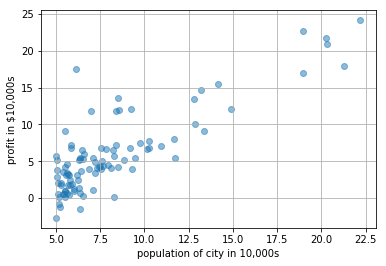

In [4]:
def plot_data(x, y):
    plt.scatter(x, y, alpha=0.5)
    plt.grid()
    plt.xlabel('population of city in 10,000s')
    plt.ylabel('profit in $10,000s')

plot_data(raw_X_1, y_1)

In [5]:
X_1 = np.stack((np.ones(raw_X_1.shape[0]), raw_X_1), axis=-1)

### Cost Function

Cost function measures the accuracy of the hypothesis function. For linear regression:

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}
(h_{\theta}(x_i) - y_i)^2$$

$$J(\theta) = \frac{1}{2m} (X \theta-y)^T (X \theta-y)$$

Where $h_{\theta}: X \to Y$ is the hypothesis function.

The goal is to minimize the  cost function:

$$\text{minimize}_{\theta_0, \theta_1} J(\theta_0, \theta_1)$$

In [6]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    tmp = X.dot(theta.T) - y
    return (tmp.T.dot(tmp)) / (2 * m)

In [7]:
theta_1 = np.zeros((2,))
compute_cost(X_1, y_1, theta_1)

32.072733877455676

### Gradient Descent

The gradient descent algorithm for linear regression is repeating this step until convergence:

$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial
\theta_j} J(\theta_0, \theta_1) \text{ where } j = 0, 1$$

Concretelly:

$$\theta_0 = \theta_0 - \alpha \frac{1}{m}
\sum_{i = 1}^{m}(h_\theta(x_i) - y_i)$$

$$\theta_1 = \theta_1 - \alpha \frac{1}{m}
\sum_{i = 1}^{m}((h_\theta(x_i) - y_i)x_i)$$

Where $\alpha$ it a learning rate. The $=$ means assigment and these assigments for $\theta_0$
and $\theta_1$ must happend simultaneously.

In [8]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros((iterations + 1))
    cost_history[0] = compute_cost(X, y, theta)
    for i in range(iterations):
        m = y.shape[0]
        theta = theta - (alpha / m) * (X.dot(theta) - y).dot(X)
        cost_history[i + 1] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [9]:
iterations_1 = 1500
alpha_1 = 0.01
theta_1, cost_history_1 = gradient_descent(
    X_1, y_1, theta_1, alpha_1, iterations_1
)

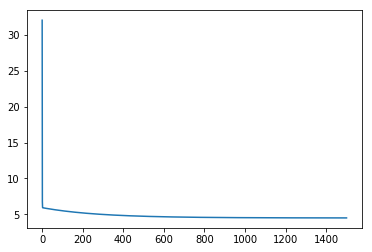

In [10]:
plt.plot(cost_history_1)

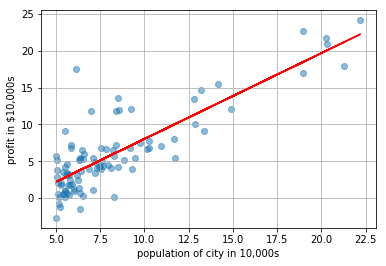

In [11]:
plot_data(raw_X_1, y_1)
plt.plot(raw_X_1, np.dot(X_1, theta_1), c='r')

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [13]:
cost_vals = np.zeros(
    (theta0_vals.shape[0],
    theta1_vals.shape[0])
)

In [14]:
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        cost_vals[i, j] = compute_cost(X_1, y_1, t)

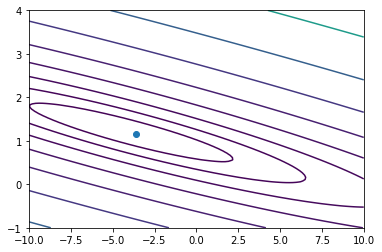

In [15]:
plt.contour(
    theta0_vals, theta1_vals, cost_vals.T,
    np.logspace(-2, 3, 20)
)
plt.scatter(theta_1[0], theta_1[1])

## Linear Regression with Multiple Variables

In [16]:
data_filename = 'data/ex1data2.txt'
data = np.loadtxt(data_filename, delimiter=',')
data.shape

(47, 3)

In [17]:
raw_X = data[:, 0:2]
y = data[:, 2]
m = y.shape[0]
raw_X.shape, y.shape, m

((47, 2), (47,), 47)

### Feature Normalization

In [18]:
def feature_normalization(X):
    mu = np.mean(raw_X, axis=0)
    sigma = np.std(raw_X, axis=0, ddof=1)
    return (raw_X - mu) / sigma, mu, sigma

X_norm, mu, sigma = feature_normalization(raw_X)
X_norm[0], mu, sigma

(array([ 0.13000987, -0.22367519]),
 array([ 2000.68085106,     3.17021277]),
 array([  7.94702354e+02,   7.60981887e-01]))

In [19]:
X = np.concatenate((np.ones((m, 1)), X_norm), axis=1)
X.shape

(47, 3)

### Learning Rate

0.01 [ 134460.93520149   39283.22767351   16518.64191783]
0.03 [ 266180.44519135   75037.93230502   18970.04059374]
0.1 [  3.38658249e+05   1.04127516e+05  -1.72205334e+02]
0.3 [ 340412.65345227  110572.96193087   -6591.38592285]
1 [ 340412.65957447  110631.05027881   -6649.47427079]


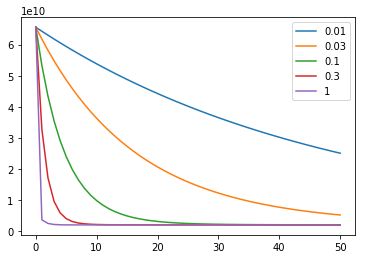

In [26]:
iterations = 50
for alpha in [0.01, 0.03, 0.1, 0.3, 1]:
    theta = np.zeros((X.shape[1]))
    theta, cost_history = gradient_descent(
        X, y, theta, alpha, iterations
    )
    print(alpha, theta)
    plt.plot(cost_history, label=str(alpha))
plt.legend()

3 [ -3.83408031e+20  -2.58270413e+32  -2.58270413e+32]


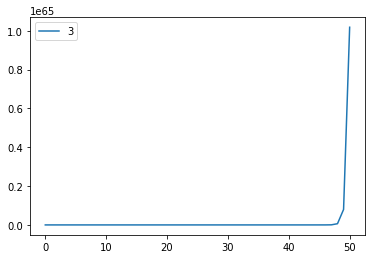

In [21]:
theta = np.zeros((X.shape[1]))
alpha = 3
theta, cost_history = gradient_descent(
    X, y, theta, alpha, iterations
)
print(alpha, theta)
plt.plot(cost_history, label=str(alpha))
plt.legend()

### Normal Equation

$$ \theta = (X^T X)^{-1} X^T y $$

In [22]:
def normal_equatition(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

In [23]:
theta = normal_equatition(
    np.concatenate((np.ones((m, 1)), raw_X), axis=1),
    y
)
theta

array([ 89597.90954355,    139.21067402,  -8738.01911255])